<a href="https://colab.research.google.com/github/deepakk177/Computer-Vission-Assignment/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [35]:
from google.colab import auth
auth.authenticate_user()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
data = pd.read_csv('/content/drive/My Drive/Heart_Disease_Prediction.csv')

In [30]:
# Split features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [32]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.9074074074074074
Confusion Matrix:
 [[31  2]
 [ 3 18]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



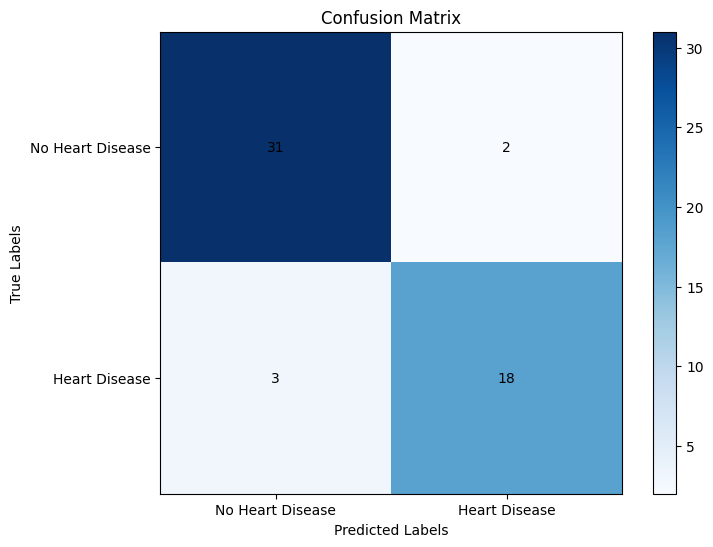

In [36]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()
